# Lending Club Loan Investor ROI Analysis

In [1]:
import numpy as np
import pandas as pd

## Load data file

In [2]:
CompleteDataDf = pd.read_csv('loansmall.csv')

### Overview and insight of data in file

In [3]:
CompleteDataDf.head(10)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1075269,1311441,5000,5000,5000.0,36 months,7.90,156.46,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1069639,1304742,7000,7000,7000.0,60 months,15.96,170.08,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1072053,1288686,3000,3000,3000.0,36 months,18.64,109.43,E,E1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1071795,1306957,5600,5600,5600.0,60 months,21.28,152.39,F,F2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1071570,1306721,5375,5375,5350.0,60 months,12.69,121.45,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
CompleteDataDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194111 entries, 0 to 194110
Data columns (total 74 columns):
id                             194111 non-null int64
member_id                      194111 non-null int64
loan_amnt                      194111 non-null int64
funded_amnt                    194111 non-null int64
funded_amnt_inv                194111 non-null float64
term                           194111 non-null object
int_rate                       194111 non-null float64
installment                    194111 non-null float64
grade                          194111 non-null object
sub_grade                      194111 non-null object
emp_title                      181934 non-null object
emp_length                     186389 non-null object
home_ownership                 194111 non-null object
annual_inc                     194107 non-null float64
verification_status            194111 non-null object
issue_d                        194111 non-null object
loan_status              

In [5]:
CompleteDataDf.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
count,1.941110e+05,1.941110e+05,194111.000000,194111.000000,194111.000000,194111.000000,194111.000000,1.941070e+05,194111.000000,194082.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,1.515750e+05,0.0,0.0,0.0
mean,4.681126e+06,5.610727e+06,13867.556836,13808.722458,13652.612595,13.983195,423.437101,7.237217e+04,16.413941,0.235782,...,NaN,NaN,NaN,NaN,NaN,NaN,3.009463e+04,NaN,NaN,NaN
std,2.996480e+06,3.591882e+06,8100.382615,8069.141618,8122.386476,4.385244,241.147755,5.618884e+04,7.606960,0.690796,...,NaN,NaN,NaN,NaN,NaN,NaN,3.845751e+04,NaN,NaN,NaN
min,5.473400e+04,7.047300e+04,500.000000,500.000000,0.000000,5.420000,15.670000,1.896000e+03,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,NaN
25%,1.680253e+06,1.895884e+06,7800.000000,7750.000000,7500.000000,10.990000,248.520000,4.500000e+04,10.720000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,1.400000e+04,NaN,NaN,NaN
50%,4.795738e+06,5.790433e+06,12000.000000,12000.000000,12000.000000,13.680000,375.490000,6.200000e+04,16.150000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,2.310000e+04,NaN,NaN,NaN
75%,7.078253e+06,8.636921e+06,19500.000000,19200.000000,19075.000000,16.990000,556.910000,8.700000e+04,21.870000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,3.750000e+04,NaN,NaN,NaN
max,1.023482e+07,1.209697e+07,35000.000000,35000.000000,35000.000000,26.060000,1408.130000,7.141778e+06,34.990000,29.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,9.999999e+06,NaN,NaN,NaN


## Copy data to new DataFrame

In [6]:
loanDf = CompleteDataDf.copy(deep=True)

In [7]:
loanDf.head(10)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1075269,1311441,5000,5000,5000.0,36 months,7.90,156.46,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1069639,1304742,7000,7000,7000.0,60 months,15.96,170.08,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1072053,1288686,3000,3000,3000.0,36 months,18.64,109.43,E,E1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1071795,1306957,5600,5600,5600.0,60 months,21.28,152.39,F,F2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1071570,1306721,5375,5375,5350.0,60 months,12.69,121.45,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Check columns for no values and drop columns with no values

In [8]:
loanDf.isnull().any().any()

True

In [9]:
loanDf.isnull().sum()

id                                  0
member_id                           0
loan_amnt                           0
funded_amnt                         0
funded_amnt_inv                     0
term                                0
int_rate                            0
installment                         0
grade                               0
sub_grade                           0
emp_title                       12177
emp_length                       7722
home_ownership                      0
annual_inc                          4
verification_status                 0
issue_d                             0
loan_status                         0
pymnt_plan                          0
url                                 0
desc                           106340
purpose                             0
title                              19
zip_code                            0
addr_state                          0
dti                                 0
delinq_2yrs                        29
earliest_cr_

In [10]:
loanDf = loanDf.dropna(axis = 1, how = 'all')

### Insight the columns and data

In [11]:
loanDf.head(10)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,...,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,0.0,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,...,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,0.0,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,...,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,0.0,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,...,NaN,Jan-15,0.0,NaN,1,INDIVIDUAL,0.0,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,...,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,0.0,NaN,NaN,NaN
5,1075269,1311441,5000,5000,5000.0,36 months,7.90,156.46,A,A4,...,NaN,Sep-15,0.0,NaN,1,INDIVIDUAL,0.0,NaN,NaN,NaN
6,1069639,1304742,7000,7000,7000.0,60 months,15.96,170.08,C,C5,...,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,0.0,NaN,NaN,NaN
7,1072053,1288686,3000,3000,3000.0,36 months,18.64,109.43,E,E1,...,NaN,Dec-14,0.0,NaN,1,INDIVIDUAL,0.0,NaN,NaN,NaN
8,1071795,1306957,5600,5600,5600.0,60 months,21.28,152.39,F,F2,...,NaN,Aug-12,0.0,NaN,1,INDIVIDUAL,0.0,NaN,NaN,NaN
9,1071570,1306721,5375,5375,5350.0,60 months,12.69,121.45,B,B5,...,NaN,Mar-13,0.0,NaN,1,INDIVIDUAL,0.0,NaN,NaN,NaN


In [12]:
loanDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194111 entries, 0 to 194110
Data columns (total 57 columns):
id                             194111 non-null int64
member_id                      194111 non-null int64
loan_amnt                      194111 non-null int64
funded_amnt                    194111 non-null int64
funded_amnt_inv                194111 non-null float64
term                           194111 non-null object
int_rate                       194111 non-null float64
installment                    194111 non-null float64
grade                          194111 non-null object
sub_grade                      194111 non-null object
emp_title                      181934 non-null object
emp_length                     186389 non-null object
home_ownership                 194111 non-null object
annual_inc                     194107 non-null float64
verification_status            194111 non-null object
issue_d                        194111 non-null object
loan_status              

In [13]:
loanDf.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,...,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
count,1.941110e+05,1.941110e+05,194111.000000,194111.000000,194111.000000,194111.000000,194111.000000,1.941070e+05,194111.000000,194082.000000,...,194111.000000,194111.000000,194111.000000,193966.000000,31180.000000,194111.0,194082.000000,151575.000000,1.515750e+05,1.515750e+05
mean,4.681126e+06,5.610727e+06,13867.556836,13808.722458,13652.612595,13.983195,423.437101,7.237217e+04,16.413941,0.235782,...,116.765152,11.252219,3518.952594,0.003078,41.689128,1.0,0.002654,78.716411,1.385543e+05,3.009463e+04
std,2.996480e+06,3.591882e+06,8100.382615,8069.141618,8122.386476,4.385244,241.147755,5.618884e+04,7.606960,0.690796,...,653.358788,105.396160,5594.304873,0.058295,20.998369,0.0,0.057677,868.146789,1.513153e+05,3.845751e+04
min,5.473400e+04,7.047300e+04,500.000000,500.000000,0.000000,5.420000,15.670000,1.896000e+03,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000e+00,0.000000e+00
25%,1.680253e+06,1.895884e+06,7800.000000,7750.000000,7500.000000,10.990000,248.520000,4.500000e+04,10.720000,0.000000,...,0.000000,0.000000,328.610000,0.000000,25.000000,1.0,0.000000,0.000000,2.787650e+04,1.400000e+04
50%,4.795738e+06,5.790433e+06,12000.000000,12000.000000,12000.000000,13.680000,375.490000,6.200000e+04,16.150000,0.000000,...,0.000000,0.000000,638.670000,0.000000,40.000000,1.0,0.000000,0.000000,8.283100e+04,2.310000e+04
75%,7.078253e+06,8.636921e+06,19500.000000,19200.000000,19075.000000,16.990000,556.910000,8.700000e+04,21.870000,0.000000,...,0.000000,0.000000,4691.290000,0.000000,58.000000,1.0,0.000000,0.000000,2.098415e+05,3.750000e+04
max,1.023482e+07,1.209697e+07,35000.000000,35000.000000,35000.000000,26.060000,1408.130000,7.141778e+06,34.990000,29.000000,...,31900.520000,7002.190000,36115.200000,4.000000,165.000000,1.0,5.000000,88303.000000,8.000078e+06,9.999999e+06


### Add new columns to Data Frame

In [14]:
loanDf['citycode'] = loanDf['zip_code'].str.slice(0,3)

In [15]:
loanDf['term_months'] = loanDf['term'].str.slice(0,3)

In [16]:
def getIssueYear(x):
    return int('20' + x.split('-')[1])

loanDf['issue_year'] = loanDf.issue_d.apply(getIssueYear)

In [17]:
loanDf.head(10)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,mths_since_last_major_derog,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,citycode,term_months,issue_year
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,...,NaN,1,INDIVIDUAL,0.0,NaN,NaN,NaN,860,36,2011
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,...,NaN,1,INDIVIDUAL,0.0,NaN,NaN,NaN,309,60,2011
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,...,NaN,1,INDIVIDUAL,0.0,NaN,NaN,NaN,606,36,2011
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,...,NaN,1,INDIVIDUAL,0.0,NaN,NaN,NaN,917,36,2011
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,...,NaN,1,INDIVIDUAL,0.0,NaN,NaN,NaN,972,60,2011
5,1075269,1311441,5000,5000,5000.0,36 months,7.90,156.46,A,A4,...,NaN,1,INDIVIDUAL,0.0,NaN,NaN,NaN,852,36,2011
6,1069639,1304742,7000,7000,7000.0,60 months,15.96,170.08,C,C5,...,NaN,1,INDIVIDUAL,0.0,NaN,NaN,NaN,280,60,2011
7,1072053,1288686,3000,3000,3000.0,36 months,18.64,109.43,E,E1,...,NaN,1,INDIVIDUAL,0.0,NaN,NaN,NaN,900,36,2011
8,1071795,1306957,5600,5600,5600.0,60 months,21.28,152.39,F,F2,...,NaN,1,INDIVIDUAL,0.0,NaN,NaN,NaN,958,60,2011
9,1071570,1306721,5375,5375,5350.0,60 months,12.69,121.45,B,B5,...,NaN,1,INDIVIDUAL,0.0,NaN,NaN,NaN,774,60,2011


In [18]:
loanDf.corr()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,...,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,issue_year
id,1.000000,0.970585,0.125117,0.135422,0.160821,0.167846,0.144287,0.019751,0.141335,0.065675,...,-0.008843,0.053229,0.033175,0.007343,NaN,0.026171,0.015994,0.003078,-0.009491,0.741648
member_id,0.970585,1.000000,0.125686,0.135927,0.161444,0.159657,0.143200,0.018062,0.134246,0.059427,...,-0.010186,0.052435,0.030742,0.007480,NaN,0.024133,0.014445,0.001926,-0.007358,0.739489
loan_amnt,0.125117,0.125686,1.000000,0.996551,0.986320,0.193517,0.950588,0.336186,0.083704,0.014527,...,0.080083,0.368059,-0.003790,-0.080326,NaN,0.012936,-0.021526,0.313434,0.254002,0.190491
funded_amnt,0.135422,0.135927,0.996551,1.000000,0.990482,0.195963,0.955838,0.334738,0.086470,0.015535,...,0.080078,0.368895,-0.003420,-0.080279,NaN,0.013322,-0.021525,0.313428,0.253997,0.204276
funded_amnt_inv,0.160821,0.161444,0.986320,0.990482,1.000000,0.199897,0.945451,0.329014,0.094204,0.016172,...,0.073817,0.367528,-0.002441,-0.080178,NaN,0.013803,-0.021537,0.313354,0.253924,0.257842
int_rate,0.167846,0.159657,0.193517,0.195963,0.199897,1.000000,0.179737,-0.022616,0.179751,0.104400,...,0.072393,0.091340,0.041241,-0.009617,NaN,0.038024,0.009833,-0.145498,-0.159168,0.203657
installment,0.144287,0.143200,0.950588,0.955838,0.945451,0.179737,1.000000,0.335329,0.085001,0.028524,...,0.075305,0.350336,0.001607,-0.077025,NaN,0.016577,-0.020314,0.277573,0.233908,0.211913
annual_inc,0.019751,0.018062,0.336186,0.334738,0.329014,-0.022616,0.335329,1.000000,-0.167451,0.058822,...,0.014440,0.152687,0.003945,-0.093871,NaN,0.013489,-0.002302,0.488271,0.275513,0.029514
dti,0.141335,0.134246,0.083704,0.086470,0.094204,0.179751,0.085001,-0.167451,1.000000,-0.004455,...,0.020503,-0.015603,0.000466,0.046204,NaN,0.008615,-0.014421,-0.017928,0.052679,0.198350
delinq_2yrs,0.065675,0.059427,0.014527,0.015535,0.016172,0.104400,0.028524,0.058822,-0.004455,1.000000,...,0.007904,0.000789,0.024254,-0.448756,NaN,0.116333,0.004048,0.078147,-0.024778,0.050529


## Grab the sample data about 20% from loanDf DataFrame

In [19]:
sampleLoanDf = loanDf.sample(frac = 0.2, axis=0)

### Checking the data in sample data frame

In [20]:
sampleLoanDf.head(10)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,mths_since_last_major_derog,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,citycode,term_months,issue_year
23482,614000,787186,25000,16225,15975.00,36 months,9.25,517.85,B,B2,...,NaN,1,INDIVIDUAL,0.0,NaN,NaN,NaN,265,36,2010
136387,5186783,6509101,18000,18000,18000.00,36 months,14.33,618.09,C,C1,...,48.0,1,INDIVIDUAL,0.0,0.0,12722.0,13100.0,486,36,2013
37014,390038,424744,9000,9000,7652.68,36 months,12.53,301.20,C,C1,...,NaN,1,INDIVIDUAL,0.0,NaN,NaN,NaN,316,36,2009
143921,4527707,5789992,20000,20000,20000.00,36 months,17.27,715.75,C,C5,...,NaN,1,INDIVIDUAL,0.0,0.0,65887.0,31500.0,150,36,2013
162897,3381660,4234732,6900,6900,6900.00,36 months,6.03,210.01,A,A1,...,NaN,1,INDIVIDUAL,0.0,0.0,5492.0,31600.0,752,36,2013
112105,6301090,7832333,26375,26375,26375.00,60 months,22.20,731.46,E,E4,...,NaN,1,INDIVIDUAL,0.0,0.0,254151.0,15812.0,957,60,2013
165335,3350220,4152980,10000,10000,10000.00,36 months,12.12,332.72,B,B3,...,65.0,1,INDIVIDUAL,0.0,157.0,23839.0,5600.0,306,36,2013
47228,9817660,11669548,30000,30000,29925.00,36 months,11.99,996.29,B,B3,...,NaN,1,INDIVIDUAL,0.0,0.0,406051.0,166500.0,952,36,2013
65025,8669916,10441675,16000,16000,15975.00,60 months,17.10,398.51,C,C5,...,70.0,1,INDIVIDUAL,0.0,0.0,12803.0,15000.0,917,60,2013
178965,2382561,2845301,15000,15000,15000.00,60 months,16.29,367.09,C,C4,...,17.0,1,INDIVIDUAL,0.0,0.0,635821.0,212900.0,103,60,2012


In [21]:
sampleLoanDf.count()

id                             38822
member_id                      38822
loan_amnt                      38822
funded_amnt                    38822
funded_amnt_inv                38822
term                           38822
int_rate                       38822
installment                    38822
grade                          38822
sub_grade                      38822
emp_title                      36429
emp_length                     37331
home_ownership                 38822
annual_inc                     38822
verification_status            38822
issue_d                        38822
loan_status                    38822
pymnt_plan                     38822
url                            38822
desc                           17377
purpose                        38822
title                          38817
zip_code                       38822
addr_state                     38822
dti                            38822
delinq_2yrs                    38818
earliest_cr_line               38818
i

#### Running regression on sample data to undestand data relevance

In [22]:
import statsmodels.formula.api as sm
result = sm.ols(formula='funded_amnt_inv ~ loan_amnt + funded_amnt + int_rate + annual_inc + citycode + term_months - 1', data=sampleLoanDf).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        funded_amnt_inv   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.983
Method:                 Least Squares   F-statistic:                     2738.
Date:                Thu, 25 Oct 2018   Prob (F-statistic):               0.00
Time:                        07:52:38   Log-Likelihood:            -3.2479e+05
No. Observations:               38822   AIC:                         6.512e+05
Df Residuals:                   37996   BIC:                         6.583e+05
Df Model:                         825                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
citycode[010]       -140.4103    125.332     -1.120      0.263    -386.065     105.244
citycode[011]        -36.2807    255.824     -0.142      0.887    -537.703     465.142
citycode[012]        -51.7555    236.059     -0.219      0.826    -514.438     410.927
citycode[013]        -49.4877    333.090     -0.149      0.882    -702.352     603.377
citycode[014]       -183.0246    211.469     -0.865      0.387    -597.509     231.460
citycode[015]       -307.8169    119.351     -2.579      0.010    -541.747     -73.887
citycode[016]       -151.9403    263.704     -0.576      0.564    -668.807     364.927
citycode[017]       -312.9421    133.075     -2.352      0.019    -573.773     -52.111
citycode[018]        -99.0210    106.468     -0.930      0.352    -307.701     109.659
citycode[019]       -174.3465    130.911     -1.332      0.183    -430.936      82.243
citycode[020]       -368.1689    153.339     -2.401      0.016    -668.718     -67.620
citycode[021]       -157.6962     73.678     -2.140      0.032    -302.108     -13.285
citycode[022]         -7.1015    607.386     -0.012      0.991   -1197.595    1183.392
citycode[023]       -279.9160    136.032     -2.058      0.040    -546.542     -13.290
citycode[024]       -675.7299    139.828     -4.833      0.000    -949.796    -401.664
citycode[025]        -55.8546    230.437     -0.242      0.808    -507.517     395.808
citycode[026]        -99.0504    220.192     -0.450      0.653    -530.633     332.532
citycode[027]       -381.3842    124.092     -3.073      0.002    -624.608    -138.161
citycode[028]       -303.7895    100.969     -3.009      0.003    -501.692    -105.887
citycode[029]        -62.7233    140.775     -0.446      0.656    -338.645     213.199
citycode[030]       -132.3374    127.408     -1.039      0.299    -382.060     117.386
citycode[031]        -62.4615    211.258     -0.296      0.767    -476.533     351.610
citycode[032]        -31.3597    236.001     -0.133      0.894    -493.928     431.208
citycode[033]       -202.8766    429.912     -0.472      0.637   -1045.515     639.762
citycode[034]       -535.2773    272.148     -1.967      0.049   -1068.694      -1.860
citycode[035]         -3.1906    607.622     -0.005      0.996   -1194.146    1187.764
citycode[036]      -5035.3780   1051.704     -4.788      0.000   -7096.746   -2974.010
citycode[037]       -217.0248    333.060     -0.652      0.515    -869.830     435.781
citycode[038]       -514.9621    176.384     -2.920      0.004    -860.679    -169.245
citycode[044]        -63.2605    743.738     -0.085      0.932   -1521.007    1394.486
citycode[050]        -74.7819    743.810     -0.101      0.920   -1532.668    1383.104
citycode[051]        -77.7599    526.235     -0.148      0.883   -1109.193     953.674
citycode[052]        -20.0399    743.9

In [23]:
import statsmodels.formula.api as sm
result = sm.ols(formula='funded_amnt_inv ~ loan_amnt + funded_amnt + int_rate + annual_inc + term_months - 1', data=sampleLoanDf).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        funded_amnt_inv   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.983
Method:                 Least Squares   F-statistic:                 4.523e+05
Date:                Thu, 25 Oct 2018   Prob (F-statistic):               0.00
Time:                        07:53:00   Log-Likelihood:            -3.2517e+05
No. Observations:               38822   AIC:                         6.504e+05
Df Residuals:                   38816   BIC:                         6.504e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
term_months[ 36]  -166.5663     21.166     -7.869      0.000    -208.052    -125.080
term_months[ 60]   -40.2552     29.495     -1.365      0.172     -98.066      17.555
loan_amnt           -0.1298      0.008    -16.132      0.000      -0.146      -0.114
funded_amnt          1.1251      0.008    139.712      0.000       1.109       1.141
int_rate             5.7384      1.353      4.240      0.000       3.086       8.391
annual_inc          -0.0003      0.000     -2.218      0.027      -0.001   -3.13e-05
==============================================================================
Omnibus:                    66359.048   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         53526094.583
Skew:                         -12.062   Prob(JB):                         0.00
Kurtosis:                     183.300   Cond. No.                     5.89e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.89e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [24]:
import statsmodels.formula.api as sm
result = sm.ols(formula='funded_amnt_inv ~ citycode - 1', data=sampleLoanDf).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        funded_amnt_inv   R-squared:                       0.030
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     1.425
Date:                Thu, 25 Oct 2018   Prob (F-statistic):           2.47e-14
Time:                        07:55:19   Log-Likelihood:            -4.0382e+05
No. Observations:               38822   AIC:                         8.093e+05
Df Residuals:                   38001   BIC:                         8.163e+05
Df Model:                         820                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
citycode[010]  1.475e+04    948.872     15.550      0.000    1.29e+04    1.66e+04
citycode[011]  1.219e+04   1952.762      6.245      0.000    8366.653     1.6e+04
citycode[012]  1.356e+04   1800.358      7.533      0.000       1e+04    1.71e+04
citycode[013]   1.24e+04   2546.090      4.869      0.000    7407.562    1.74e+04
citycode[014]  1.567e+04   1610.289      9.731      0.000    1.25e+04    1.88e+04
citycode[015]  1.653e+04    900.179     18.364      0.000    1.48e+04    1.83e+04
citycode[016]  1.371e+04   2012.861      6.811      0.000    9765.084    1.77e+04
citycode[017]  1.412e+04   1006.430     14.028      0.000    1.21e+04    1.61e+04
citycode[018]  1.365e+04    801.149     17.033      0.000    1.21e+04    1.52e+04
citycode[019]  1.351e+04    991.064     13.636      0.000    1.16e+04    1.55e+04
citycode[020]  1.564e+04   1162.126     13.456      0.000    1.34e+04    1.79e+04
citycode[021]  1.264e+04    542.828     23.292      0.000    1.16e+04    1.37e+04
citycode[022]  1.532e+04   4648.503      3.295      0.001    6205.477    2.44e+04
citycode[023]  1.269e+04   1030.882     12.308      0.000    1.07e+04    1.47e+04
citycode[024]  1.485e+04   1057.206     14.050      0.000    1.28e+04    1.69e+04
citycode[025]  1.321e+04   1756.969      7.520      0.000    9768.966    1.67e+04
citycode[026]  1.295e+04   1678.842      7.714      0.000    9659.425    1.62e+04
citycode[027]  1.654e+04    935.961     17.675      0.000    1.47e+04    1.84e+04
citycode[028]  1.186e+04    757.416     15.664      0.000    1.04e+04    1.33e+04
citycode[029]  1.264e+04   1066.440     11.848      0.000    1.05e+04    1.47e+04
citycode[030]  1.442e+04    962.332     14.988      0.000    1.25e+04    1.63e+04
citycode[031]  1.157e+04   1610.289      7.183      0.000    8410.791    1.47e+04
citycode[032]  1.226e+04   1800.358      6.810      0.000    8731.119    1.58e+04
citycode[033]  1.985e+04   3286.988      6.038      0.000    1.34e+04    2.63e+04
citycode[034]  1.017e+04   2078.874      4.891      0.000    6093.952    1.42e+04
citycode[035]  1.591e+04   4648.503      3.422      0.001    6797.144     2.5e+04
citycode[036]  3000.0000   8051.444      0.373      0.709   -1.28e+04    1.88e+04
citycode[037]  1.348e+04   2546.090      5.295      0.000    8490.859    1.85e+04
citycode[038]  1.266e+04   1341.907      9.437      0.000       1e+04    1.53e+04
citycode[044]  5952.4400   5693.231      1.046      0.296   -5206.442    1.71e+04
citycode[050]  9000.0000   5693.231      1.581      0.114   -2158.882    2.02e+04
citycode[051]  7825.0000   4025.722      1.944      0.052     -65.521    1.57e+04
citycode[052]  1.387e+04   5693.231      2.437      0.015    2716.118     2.5e+04
citycode[053]  6750.0000   8051.444      0.838      0.402   -9031.043    2.25e+04
citycode[054]  1.142e+04   1549.501      7.373   

### Lets visualize data

In [25]:
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

%matplotlib inline

import seaborn as sns

#### Number of Loans by Year

Text(0.5,0,'Issue Year')

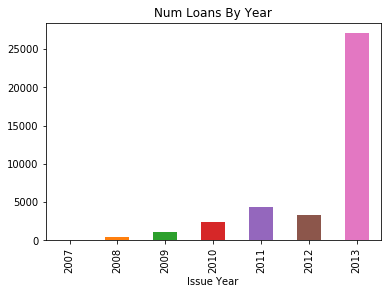

In [26]:
loanByYr = sampleLoanDf.groupby('issue_year')
loanYrPlt = loanByYr.id.agg(np.count_nonzero).plot(kind = 'bar')
loanYrPlt.set_title('Num Loans By Year')
loanYrPlt.set_xlabel('Issue Year')

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
No handles with labels found to put in legend.


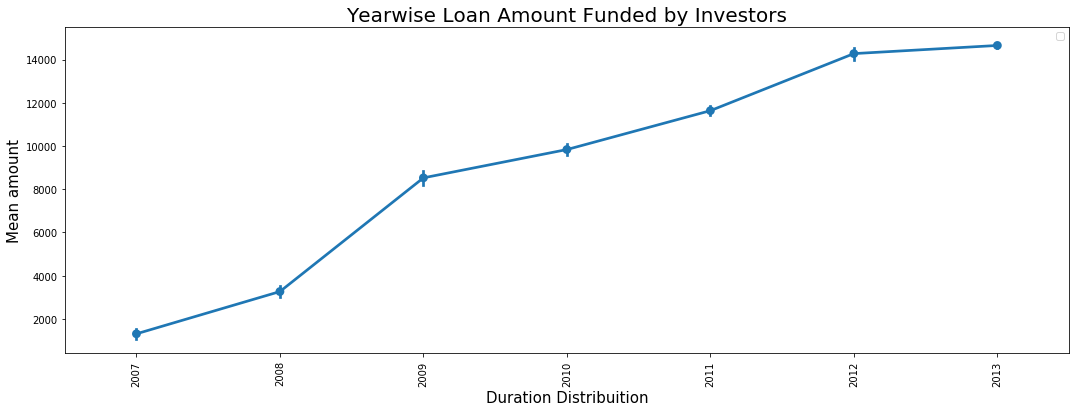

In [28]:
plt.figure(figsize = (18,6))

g = sns.pointplot(x='issue_year', y='funded_amnt_inv', 
              data=sampleLoanDf)
g.set_xticklabels(g.get_xticklabels(),rotation=90)
g.set_xlabel("Duration Distribuition", fontsize=15)
g.set_ylabel("Mean amount", fontsize=15)
g.set_title("Yearwise Loan Amount Funded by Investors", fontsize=20)
plt.legend(loc=1)
plt.show()

In [29]:
#invloan_df = sampleLoanDf['issue_year'].value_counts().sort_index()
#invloan_df = invloan_df.cumsum()

In [30]:
#invloan_df.plot(x='issue_year', figsize=(20,10), title='Yearwise number of loans')

Text(0.5,1,'Histogram of Loan Amount')

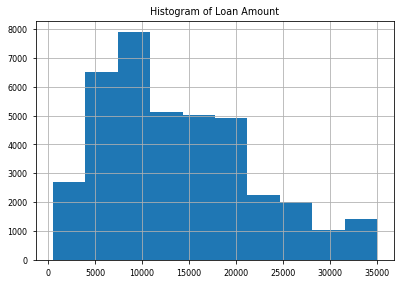

In [31]:
plt.style.use('seaborn-paper')

amount_hist = sampleLoanDf.loan_amnt.hist()
amount_hist.set_title('Histogram of Loan Amount')

Text(0.5,1,'Histogram of Loan Amount by Investors')

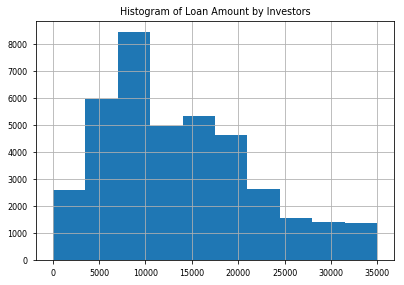

In [32]:
plt.style.use('seaborn-paper')

inv_amount_hist = sampleLoanDf.funded_amnt_inv.hist()
inv_amount_hist.set_title('Histogram of Loan Amount by Investors')

#### Loan Amount Distribution v/s Funded Amount by Investors

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Funded Amount by Investors')

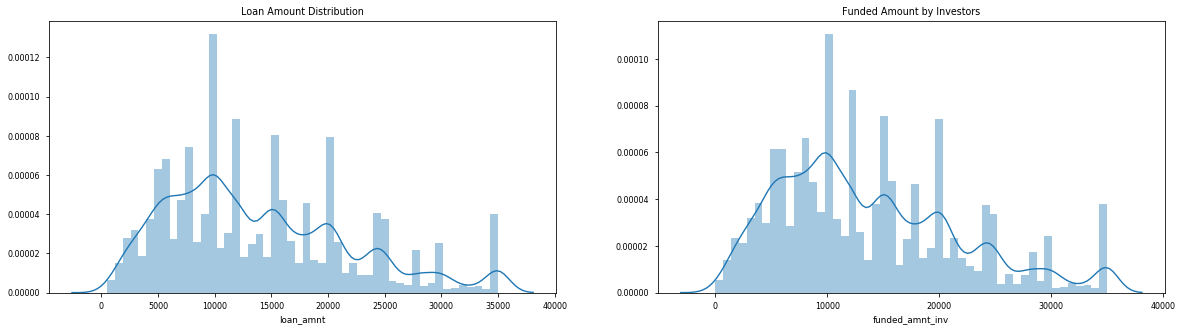

In [33]:
fig, ax = plt.subplots(1, 2, figsize=(20,5))
sns.distplot(sampleLoanDf['loan_amnt'], ax=ax[0])
ax[0].set_title("Loan Amount Distribution")
sns.distplot(sampleLoanDf['funded_amnt_inv'], ax=ax[1])
ax[1].set_title("Funded Amount by Investors")

#### Loan Amount Repayment v/s Amounts Returned to Investors

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Total Payments Amount for Investors')

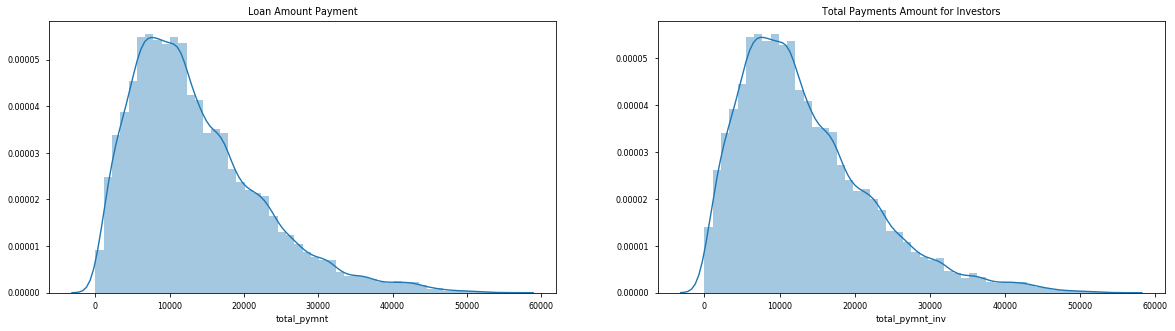

In [34]:
fig, ax = plt.subplots(1, 2, figsize=(20,5))
sns.distplot(sampleLoanDf['total_pymnt'], ax=ax[0])
ax[0].set_title("Loan Amount Payment")
sns.distplot(sampleLoanDf['total_pymnt_inv'], ax=ax[1])
ax[1].set_title("Total Payments Amount for Investors")

In [35]:
#plt.style.available

In [36]:
yearGroup = sampleLoanDf.groupby('issue_year')
yearGroup['funded_amnt_inv'].agg([np.count_nonzero, np.mean, np.std])

,count_nonzero,mean,std
issue_year,,,
2007,111.0,1308.905863,1222.222152
2008,440.0,3264.380433,3082.154052
2009,1044.0,8525.428024,5421.220839
2010,2448.0,9835.184582,5975.246914
2011,4350.0,11634.544757,7658.010383
2012,3343.0,14274.278678,8208.974595
2013,27048.0,14651.330043,8063.580179


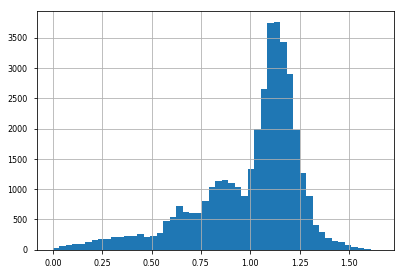

In [38]:
sampleLoanDf['pct_paid'] = sampleLoanDf.total_pymnt_inv / sampleLoanDf.funded_amnt_inv

#sampleLoanDf[sampleLoanDf.loan_status == 'Current'].pct_paid.hist(bins = 50)
sampleLoanDf.pct_paid.hist(bins = 50)

## Now run data visualization on entire data

#### Number of Loans by Year

Text(0.5,0,'Issue Year')

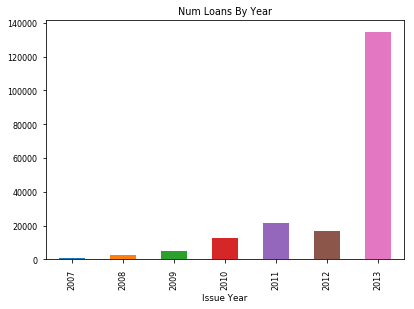

In [39]:
loanByYr = loanDf.groupby('issue_year')
loanYrPlt = loanByYr.id.agg(np.count_nonzero).plot(kind = 'bar')
loanYrPlt.set_title('Num Loans By Year')
loanYrPlt.set_xlabel('Issue Year')

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
No handles with labels found to put in legend.


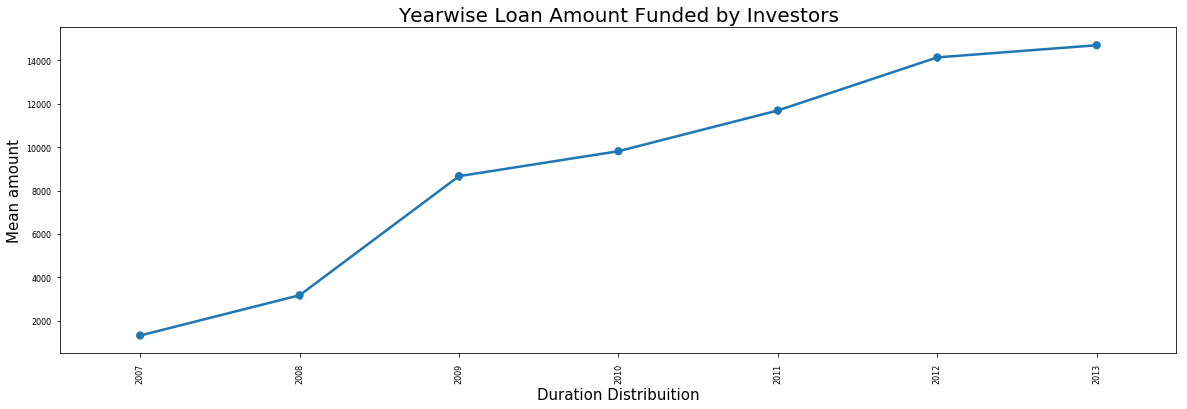

In [40]:
plt.figure(figsize = (20,6))

g = sns.pointplot(x='issue_year', y='funded_amnt_inv', 
              data=loanDf)
g.set_xticklabels(g.get_xticklabels(),rotation=90)
g.set_xlabel("Duration Distribuition", fontsize=15)
g.set_ylabel("Mean amount", fontsize=15)
g.set_title("Yearwise Loan Amount Funded by Investors", fontsize=20)
plt.legend(loc=1)
plt.show()

Text(0.5,1,'Histogram of Loan Amount')

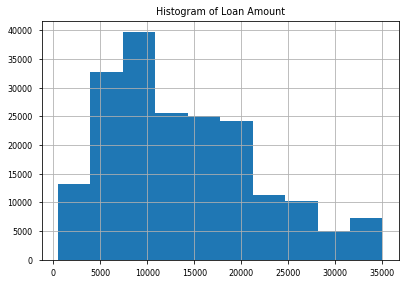

In [41]:
plt.style.use('seaborn-paper')

amount_hist = loanDf.loan_amnt.hist()
amount_hist.set_title('Histogram of Loan Amount')

Text(0.5,1,'Histogram of Loan Amount by Investors')

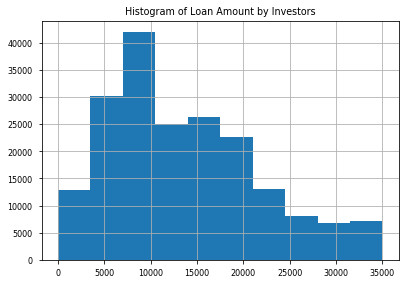

In [42]:
plt.style.use('seaborn-paper')

inv_amount_hist = loanDf.funded_amnt_inv.hist()
inv_amount_hist.set_title('Histogram of Loan Amount by Investors')

#### Loan Amount Distribution v/s Funded Amount by Investors

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Funded Amount by Investors')

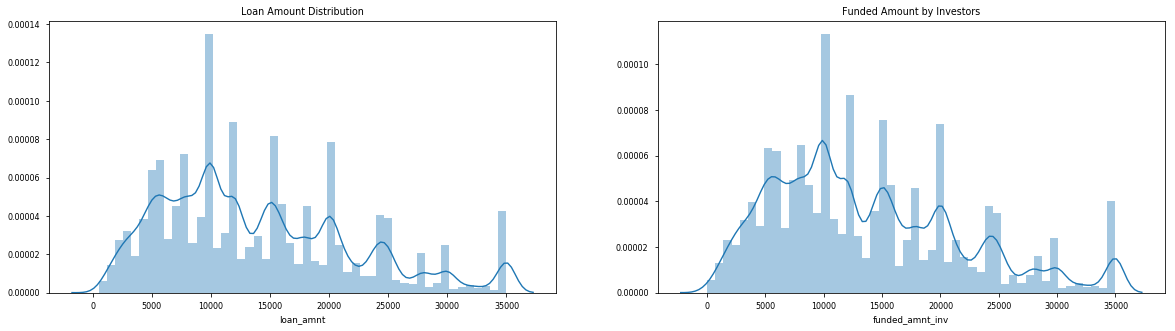

In [43]:
fig, ax = plt.subplots(1, 2, figsize=(20,5))
sns.distplot(loanDf['loan_amnt'], ax=ax[0])
ax[0].set_title("Loan Amount Distribution")
sns.distplot(loanDf['funded_amnt_inv'], ax=ax[1])
ax[1].set_title("Funded Amount by Investors")

#### Loan Amount Repayment v/s Amounts Returned to Investors

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Total Payments Amount for Investors')

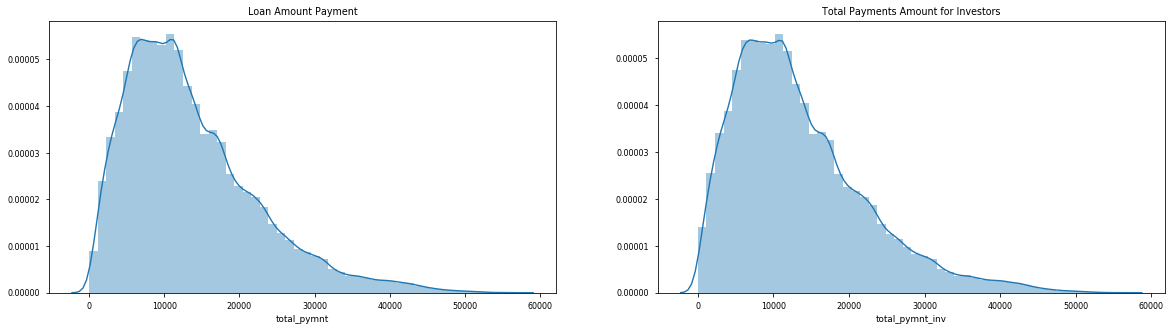

In [44]:
fig, ax = plt.subplots(1, 2, figsize=(20,5))
sns.distplot(loanDf['total_pymnt'], ax=ax[0])
ax[0].set_title("Loan Amount Payment")
sns.distplot(loanDf['total_pymnt_inv'], ax=ax[1])
ax[1].set_title("Total Payments Amount for Investors")

In [45]:
#plt.style.available

In [46]:
yearGroup = loanDf.groupby('issue_year')
yearGroup['funded_amnt_inv'].agg([np.count_nonzero, np.mean, np.std])

,count_nonzero,mean,std
issue_year,,,
2007,594.0,1325.679547,1137.261660
2008,2169.0,3180.186848,2982.922516
2009,5281.0,8668.410932,5477.541858
2010,12537.0,9817.702888,5992.421430
2011,21721.0,11694.935937,7750.314342
2012,16821.0,14140.829939,8212.008890
2013,134755.0,14700.468913,8095.597431


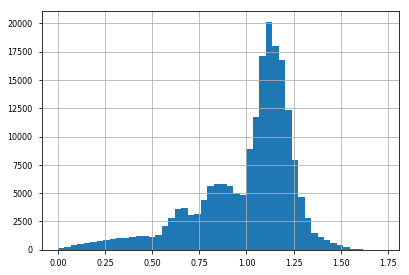

In [47]:
loanDf['pct_paid'] = loanDf.total_pymnt_inv / loanDf.funded_amnt_inv

#sampleLoandf[sampleLoandf.loan_status == 'Current'].pct_paid.hist(bins = 50)
loanDf.pct_paid.hist(bins = 50)